# Training with Sci-Kit Learn Models
The goal is to improve the accuracy of the model. I will be using the Sci-Kit Learn library and it's different methods to achieve this.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load data
path = "Dataset/ultimate_college_championship.csv"
df = pd.read_csv(path)
df.head()

,player,level,gender,division,team_name,Turns,Ds,Assists,Points,plus_minus,team_games,turns_per_game,ds_per_game,ast_per_game,pts_per_game,pls_mns_per_game
0,Jacques Nissen,Division 1,Men,Division 1 Men,Brown Brownian Motion,12,8,38,13,47,8,1.500000,1.000000,4.750000,1.625000,5.875
1,Cal Nightingale,Division 1,Men,Division 1 Men,Brown Brownian Motion,3,0,12,27,36,8,0.375000,0.000000,1.500000,3.375000,4.500
2,Faye Burdick,Division 1,Women,Division 1 Women,Colorado Quandary,6,12,16,13,35,7,0.857143,1.714286,2.285714,1.857143,5.000
3,Matthew Gregor,Division 3,Men,Division 3 Men,Franciscan Fatal,2,6,3,26,33,6,0.333333,1.000000,0.500000,4.333333,5.500
4,Frankie Saraniti,Division 3,Women,Division 3 Women,Carleton Eclipse,11,15,12,17,33,6,1.833333,2.500000,2.000000,2.833333,5.500


In [3]:
# Converts 'level' into 1 or -1 (1 = Division 1, -1 = Division 3)
def to_int(cell):
    if cell == 'Division 1':
        return 1
    return -1

df['level']=df['level'].apply(to_int)

In [4]:
# Gets data from df and processes it for training
def get_arrays(gender='Men', start=0, end=len(df) - 1):
    temp_df = df.iloc[start:end]
    temp_df = temp_df[temp_df['gender'] == gender]
    x_array = np.asarray(temp_df.iloc[:, 11:])
    y_array = np.asarray(temp_df['level'])
    print(f"x_array shape: {x_array.shape} y_array shape: {y_array.shape}")
    return x_array, y_array

In [5]:
# Creates a pandas DataFrame for results, prints accuracy
def get_results(prediction, actual):
    data = {
        'Prediction': prediction,
        'Actual': actual
    }
    results = pd.DataFrame(data)
    num_correct = len(results[results['Prediction'] == results['Actual']])
    total = len(results)
    accuracy = round(num_correct/total * 100, 2)
    print(f"Accuracy: {accuracy}%")
    return results

In [6]:
x_train, y_train = get_arrays(gender='Men', end = 445)
x_test, y_test = get_arrays(gender='Men', start = 445)
print(len(df[df['gender'] == 'Men']))

x_array shape: (270, 5) y_array shape: (270,)
x_array shape: (623, 5) y_array shape: (623,)
893


# Correlation Heat Map

Identify if there are any correlating values.

In [7]:
import seaborn as sns

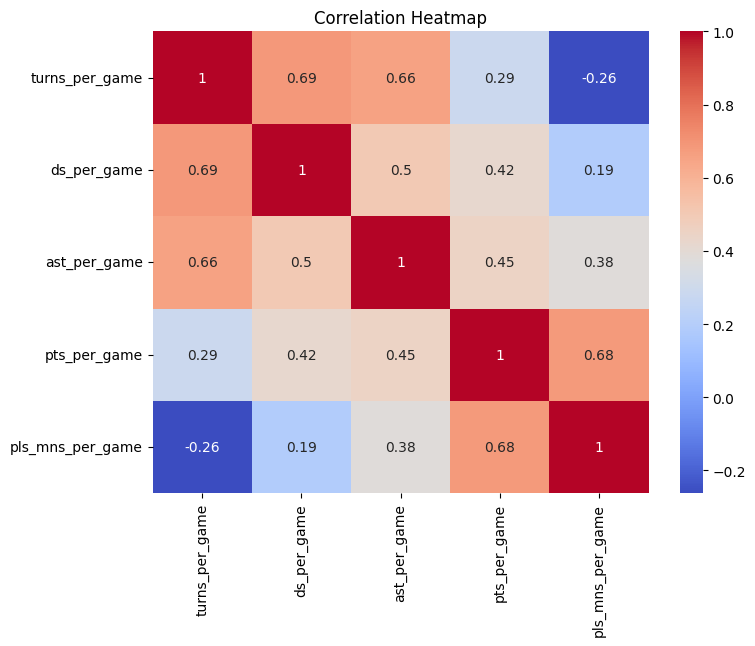

In [8]:
# Gather features and plot the heatmap

features = df.iloc[:, 11:]
matrix = features.corr()

plt.figure(figsize=(8,6))
sns.heatmap(matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Decision Tree

In [9]:
from sklearn import tree

In [10]:
# Running the tree model
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)

In [11]:
# Get predictions and results
predictions = clf.predict(x_test)
results = get_results(predictions, y_test)

Accuracy: 56.02%


[Text(0.39542214912280704, 0.96875, 'x[1] <= 0.31\ngini = 0.483\nsamples = 270\nvalue = [110, 160]'),
 Text(0.23684210526315788, 0.90625, 'x[1] <= 0.183\ngini = 0.364\nsamples = 92\nvalue = [22, 70]'),
 Text(0.31613212719298245, 0.9375, 'True  '),
 Text(0.10526315789473684, 0.84375, 'x[2] <= 0.183\ngini = 0.448\nsamples = 56\nvalue = [19, 37]'),
 Text(0.05263157894736842, 0.78125, 'x[1] <= 0.155\ngini = 0.486\nsamples = 12\nvalue = [7, 5]'),
 Text(0.03508771929824561, 0.71875, 'x[3] <= 0.845\ngini = 0.494\nsamples = 9\nvalue = [4, 5]'),
 Text(0.017543859649122806, 0.65625, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.05263157894736842, 0.65625, 'x[3] <= 2.9\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(0.03508771929824561, 0.59375, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.07017543859649122, 0.59375, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.07017543859649122, 0.71875, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.15789473684210525, 0.78125, 'x[0]

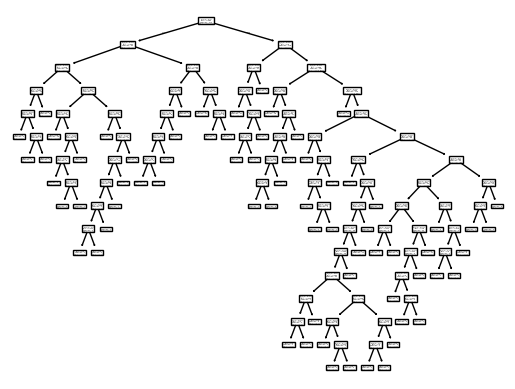

In [12]:
tree.plot_tree(clf)

# Principal Component Analysis

Goal is to try and see if there are any values that show more clearly if someone is of division 1 or 3. Then we can apply an unsupervised learning algorithm to try and find the correct groups.

In [13]:
from sklearn.decomposition import PCA

In [14]:
# Creating the PCs and getting data for the scree plot
pca = PCA(n_components=x_train.shape[1])
pca.fit(x_train)
pca_data = pca.transform(x_train)
percent_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = ["PC" + str(x) for x in range(1, len(percent_var) + 1)]

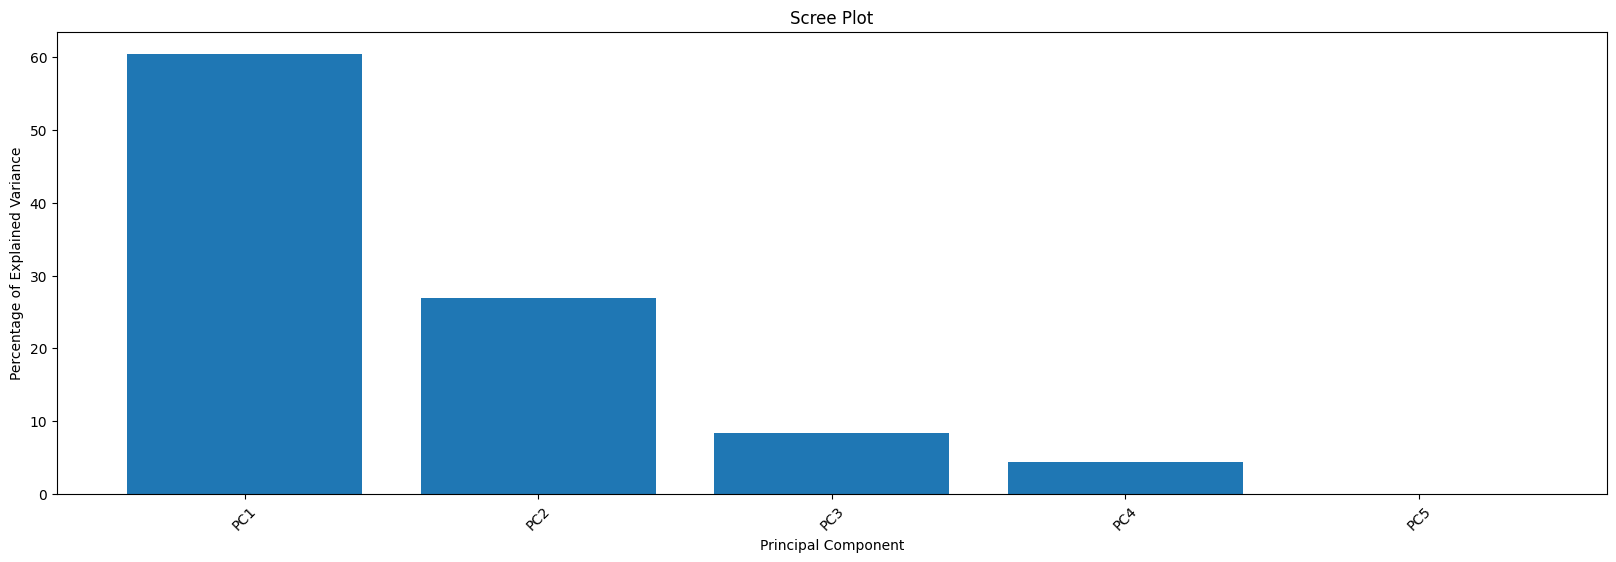

In [15]:
# Scree Plot
plt.figure(figsize=(20,6))
plt.bar(x = range(1, len(percent_var) + 1), height = percent_var, tick_label = labels)
plt.ylabel("Percentage of Explained Variance")
plt.xticks(rotation=45)
plt.xlabel("Principal Component")
plt.title("Scree Plot")
plt.show()

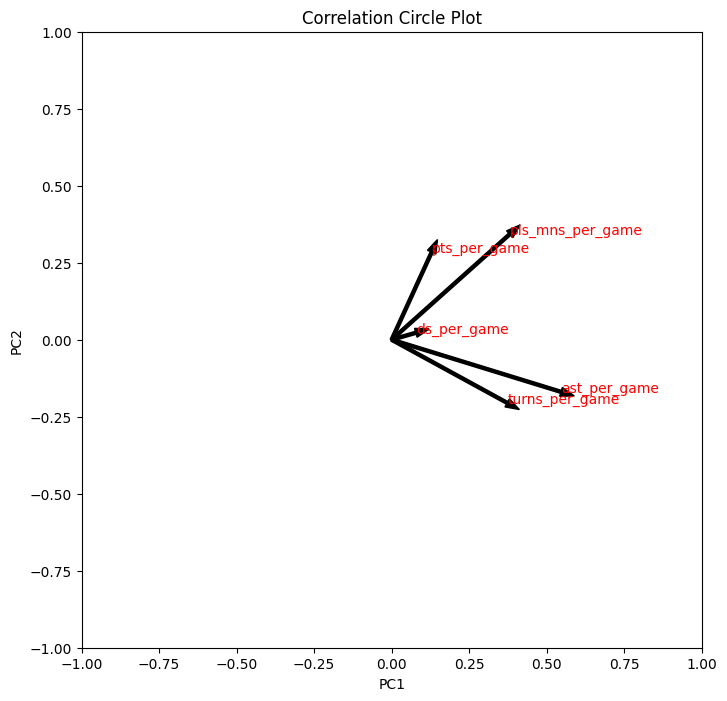

In [16]:
variance = pca.explained_variance_ratio_
loadings = pca.components_.T * np.sqrt(variance)
training_df = df[df['gender'] == 'Men']
training_df = training_df.iloc[:, 11:]

plt.figure(figsize=(8, 8))
plt.title('Correlation Circle Plot')
plt.xlabel('PC1')
plt.ylabel('PC2')

for i, feature in enumerate(training_df.columns):
    plt.annotate(feature,
                 (loadings[i, 0],
                  loadings[i, 1]),
                  color='red')
    plt.arrow(0, 0,
              loadings[i, 0],
              loadings[i, 1],
              color='black',
              width=0.01)
    
plt.xlim(-1,1)
plt.ylim(-1,1)

plt.show()

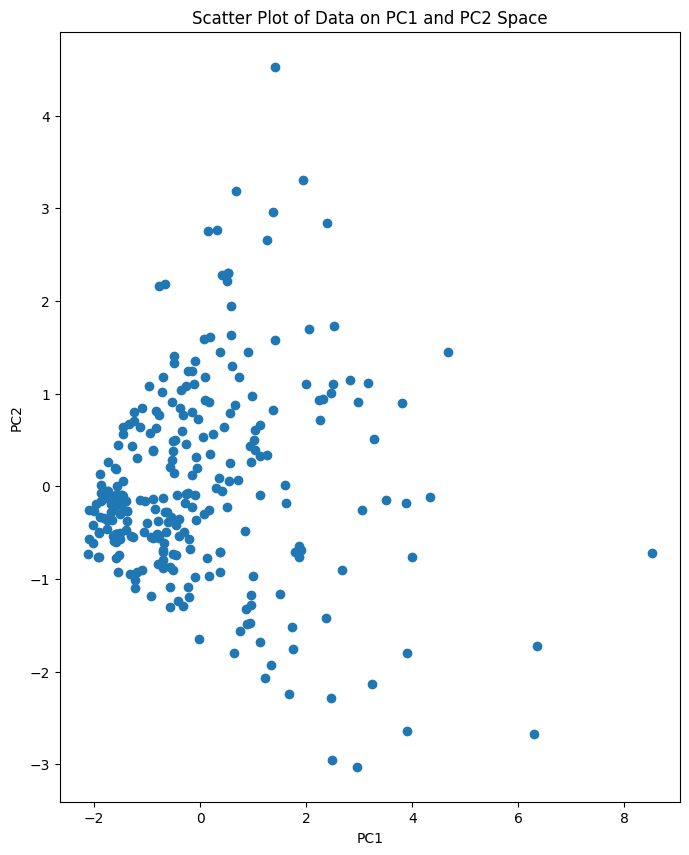

In [17]:
PC1 = pca_data[:, 0]
PC2 = pca_data[:, 1]

plt.figure(figsize=(8, 10))
plt.scatter(PC1, PC2)
plt.title("Scatter Plot of Data on PC1 and PC2 Space")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

The PCA itself does not show any distinct points of areas of separation for the data.

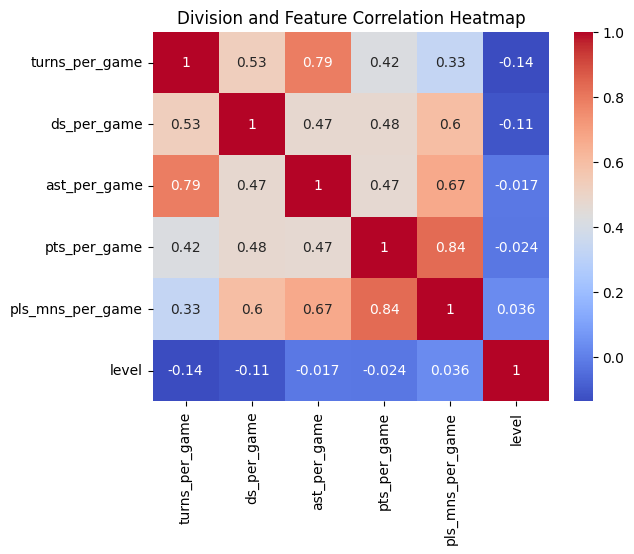

In [42]:
features_col = df.iloc[:, 11:].columns.tolist()
features_col.append('level')
correlation = df[df['gender'] == 'Men']
correlation = correlation[features_col]
matrix = correlation.corr()
plt.Figure(figsize=(10,10))
sns.heatmap(matrix, annot=True, cmap='coolwarm')
plt.title("Division and Feature Correlation Heatmap")
plt.show()